In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [15]:
lr = 0.1
EPOCHS = 100

epoch: 10, loss = 572.0665
epoch: 20, loss = 340.7082
epoch: 30, loss = 332.8503
epoch: 40, loss = 332.5775
epoch: 50, loss = 332.5679
epoch: 60, loss = 332.5676
epoch: 70, loss = 332.5676
epoch: 80, loss = 332.5675
epoch: 90, loss = 332.5676
epoch: 100, loss = 332.5676


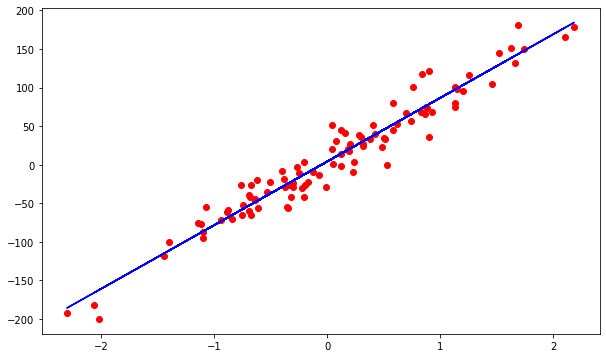

In [22]:
# data
X, y = datasets.make_regression(
    n_samples=100, n_features=1,
    noise = 20, random_state=1
)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32)).reshape((-1, 1)) 
# to reshape to a column vector

n_samples, n_features = X.shape

# 1. model
model = nn.Linear(
    in_features = n_features, out_features=1
)

# 2. optimizer & loss
loss = nn.MSELoss()
optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=lr
)

# 3. training loop
for epoch in range(EPOCHS):
    # forward pass and loss
    y_pred = model(X)
    l = loss(y_pred, y)
    
    # backward pass
    l.backward()
    
    # weight update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.4f}')
        
# plot
predicted = model(X).detach().numpy() 
# need to remove from computational graph

plt.figure(figsize=(10, 6))
plt.plot(X.numpy(), y.numpy(), 'ro')
plt.plot(X.numpy(), predicted, 'b')
plt.show()


In [11]:
y.shape

torch.Size([100, 1])

In [21]:
loss

MSELoss()